In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [8]:
df = pd.read_csv('/content/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [10]:
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean   1.938202    13.000618   2.336348    2.366517    19.494944   99.741573    
std    0.775035    0.811827    1.117146    0.274344    3.339564    14.282484    
min    1.000000    11.030000   0.740000    1.360000    10.600000   70.000000    
25%    1.000000    12.362500   1.602500    2.210000    17.200000   88.000000    
50%    2.000000    13.050000   1.865000    2.360000    19.500000   98.000000    
75%    3.000000    13.677500   3.082500    2.557500    21.500000   107.000000   
max    3.000000    14.830000   5.800000    3.230000    30.000000   162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000  178.000000     178.000000       178.000000   
mean   2.295112    2.029270    0.361854       1.590899         5.058090     
std    0.625851    0.998859    0.124453

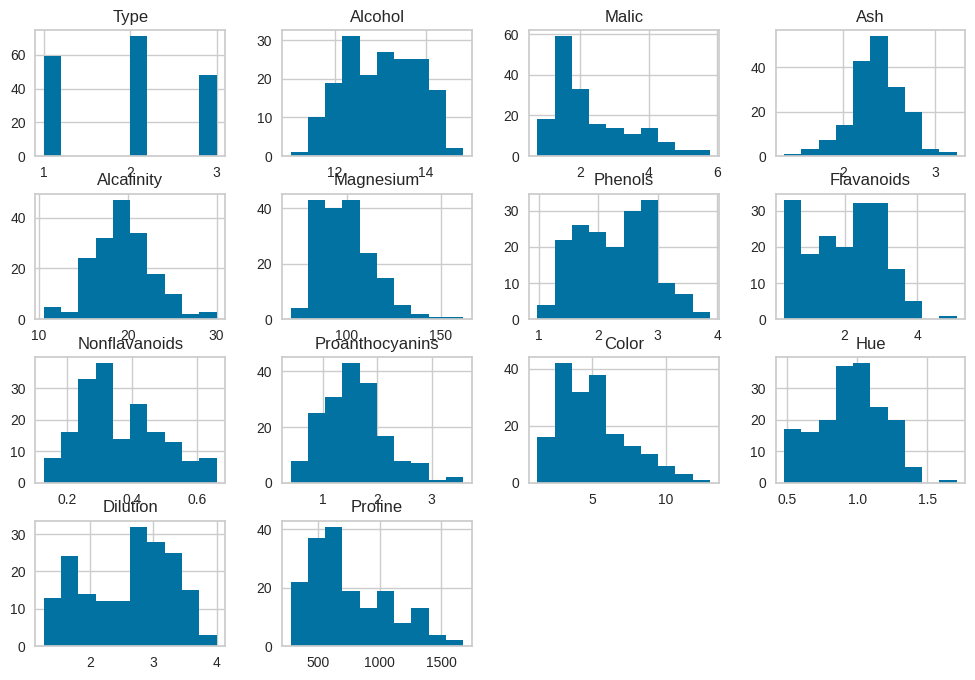

In [11]:
df.hist(figsize=(12, 8))
plt.show()

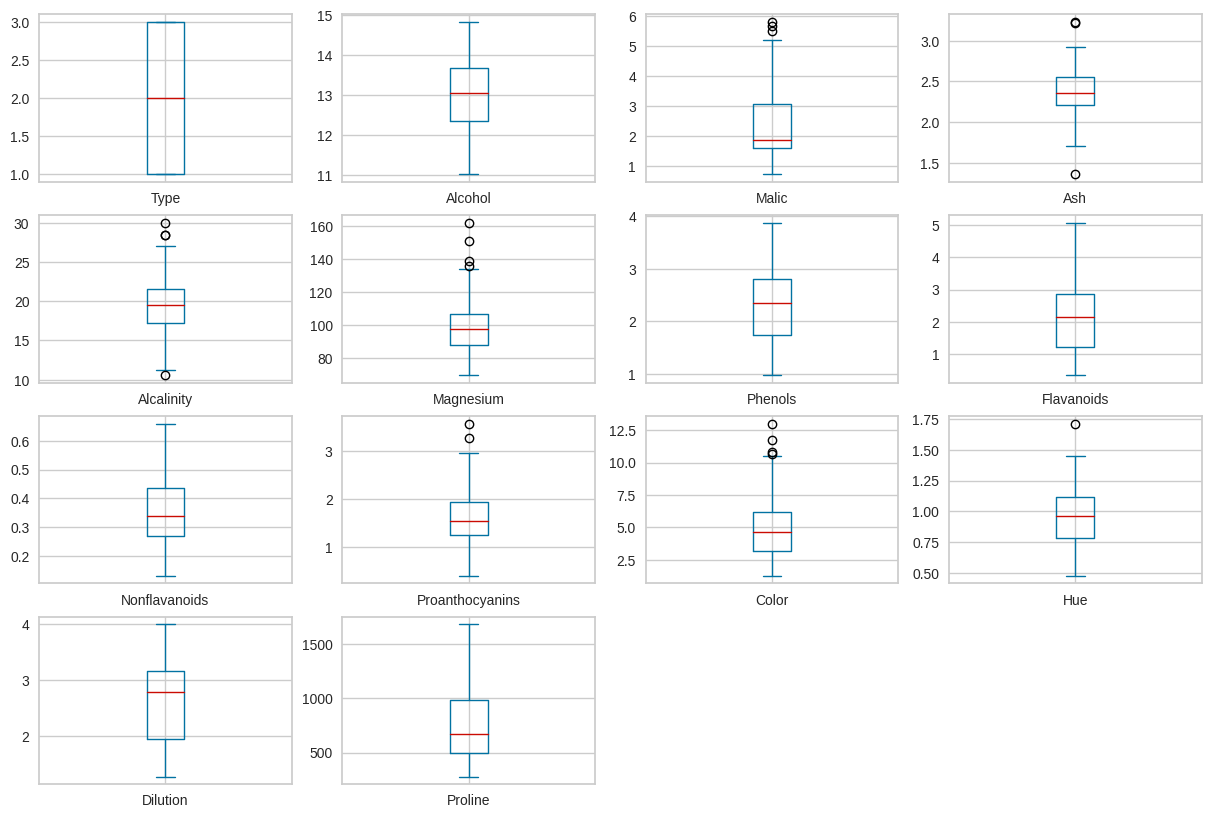

In [12]:
df.plot(kind='box', subplots=True, layout=(int(np.ceil(df.shape[1]/4)), 4), figsize=(15, 10))
plt.show()

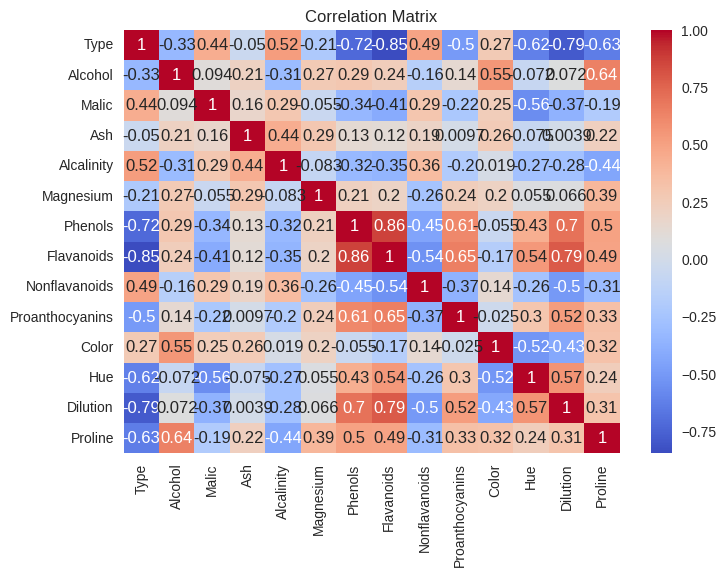

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [15]:
pca = PCA()
pca.fit(df_scaled)

PCA()

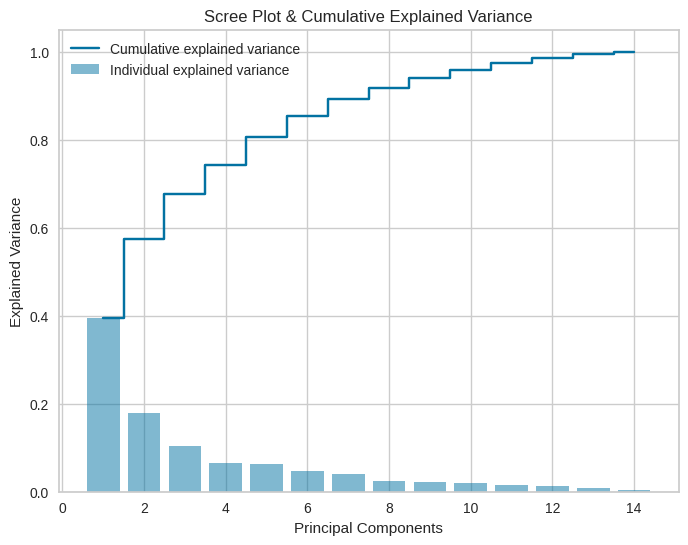

In [17]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend(loc='best')
plt.show()

In [18]:
n_components = np.argmax(cumulative_variance > 0.9) + 1
print(f"Optimal number of components: {n_components}")


Optimal number of components: 8


In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
df['cluster'] = kmeans.fit_predict(df_scaled)


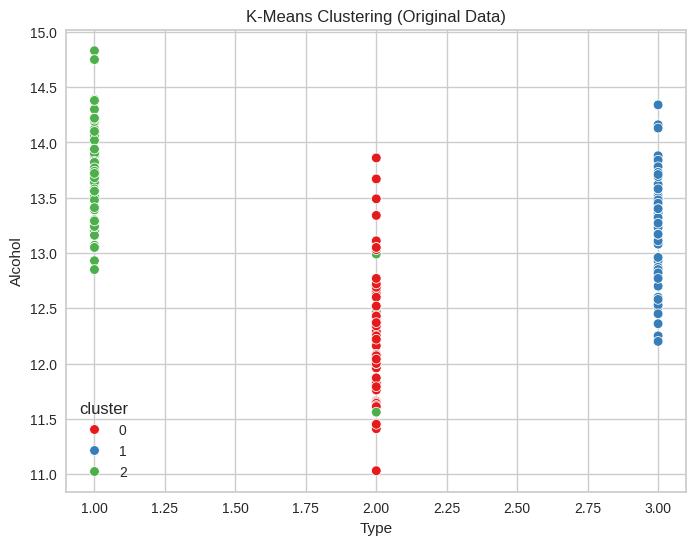

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['cluster'], palette='Set1')
plt.title('K-Means Clustering (Original Data)')
plt.show()

In [21]:
silhouette_avg = silhouette_score(df_scaled, df['cluster'])
db_score = davies_bouldin_score(df_scaled, df['cluster'])
print(f'Silhouette Score (Original Data): {silhouette_avg}')
print(f'Davies-Bouldin Index (Original Data): {db_score}')

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [30]:
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled) #This line was missing and caused the error. It creates the df_pca dataframe using PCA.
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca_clusters = kmeans_pca.fit_predict(df_pca)

In [31]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca_clusters = kmeans_pca.fit_predict(df_pca)

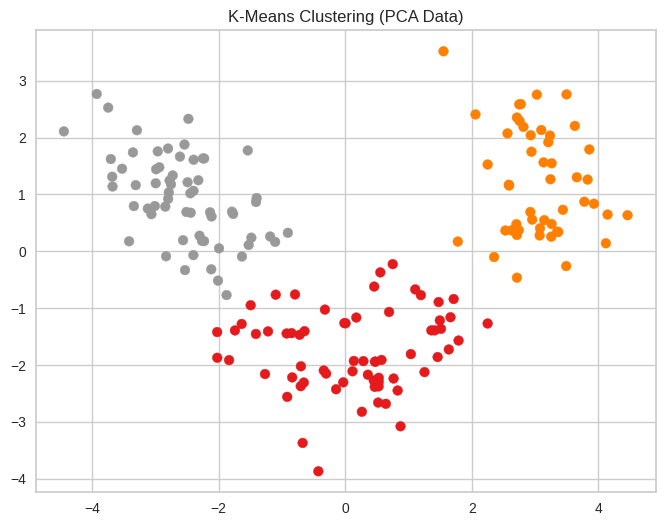

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_pca_clusters, cmap='Set1')
plt.title('K-Means Clustering (PCA Data)')
plt.show()

In [33]:
silhouette_avg_pca = silhouette_score(df_pca, df_pca_clusters)
db_score_pca = davies_bouldin_score(df_pca, df_pca_clusters)
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA Data): {db_score_pca}')

Silhouette Score (PCA Data): 0.3402428666857789
Davies-Bouldin Index (PCA Data): 1.1903042789637739


In [34]:
print(f'Silhouette Score (Original Data): {silhouette_avg}')
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (Original Data): {db_score}')
print(f'Davies-Bouldin Index (PCA Data): {db_score_pca}')

Silhouette Score (Original Data): 0.30648398324833453
Silhouette Score (PCA Data): 0.3402428666857789
Davies-Bouldin Index (Original Data): 1.315707552261773
Davies-Bouldin Index (PCA Data): 1.1903042789637739


In [35]:
if silhouette_avg_pca > silhouette_avg:
    print("PCA improved clustering performance based on Silhouette Score.")
else:
    print("Clustering performed better without PCA.")

PCA improved clustering performance based on Silhouette Score.
